Alexnet Architecture for CIFAR10 dataset classification

In [1]:
from tensorflow.keras.datasets.cifar10 import load_data

Load Data

In [3]:
(trainX, trainy), (testX, testy ) = load_data()

170508288/170498071 [==============================] - 4s 0us/step


Preprocessing

In [4]:
#Normalization
from numpy import asarray
trainX = trainX.astype('float32')/255
testX = testX.astype('float32')/255

In [5]:
#Validation
val_x, val_y= trainX[:5000], trainy[:5000]


In [6]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Activation


Step1: Define the model

In [8]:
Alexnet = Sequential()

#1st Conv layer
Alexnet.add(Conv2D(filters=96, kernel_size=(11,11), strides=(4,4), padding='same', input_shape=(32,32,3)))
Alexnet.add(BatchNormalization())
Alexnet.add(Activation('relu'))
Alexnet.add(MaxPool2D(pool_size=(2,2), strides=(2,2), padding='same'))

#2st Conv layer
Alexnet.add(Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), padding='same'))
Alexnet.add(BatchNormalization())
Alexnet.add(Activation('relu'))
Alexnet.add(MaxPool2D(pool_size=(2,2), strides=(2,2), padding='same'))

#3st Conv layer
Alexnet.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'))
Alexnet.add(BatchNormalization())
Alexnet.add(Activation('relu'))

#4st Conv layer
Alexnet.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'))
Alexnet.add(BatchNormalization())
Alexnet.add(Activation('relu'))

#4st Conv layer
Alexnet.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same'))
Alexnet.add(BatchNormalization())
Alexnet.add(Activation('relu'))

Alexnet.add(Flatten())

#1st FC Layer
Alexnet.add(Dense(4096))
Alexnet.add(BatchNormalization())
Alexnet.add(Activation('relu'))

Alexnet.add(Dropout(0.4))

#2st FC Layer
Alexnet.add(Dense(4096))
Alexnet.add(BatchNormalization())
Alexnet.add(Activation('relu'))

Alexnet.add(Dropout(0.4))

#3st FC Layer
Alexnet.add(Dense(1000))
Alexnet.add(BatchNormalization())
Alexnet.add(Activation('relu'))

Alexnet.add(Dropout(0.4))

#output layer
Alexnet.add(Dense(10))
Alexnet.add(BatchNormalization())
Alexnet.add(Activation('softmax'))





Step2: Compile the model

In [12]:
import tensorflow as tf
opt = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)
Alexnet.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=['accuracy'] )

Step3: Fit th model

In [14]:
history = Alexnet.fit(x=trainX, y=trainy, epochs=10, batch_size=100, validation_data=(val_x, val_y))

Epoch 1/10
500/500 [==============================] - 863s 2s/step - loss: 1.6861 - accuracy: 0.3876 - val_loss: 1.7520 - val_accuracy: 0.3800
Epoch 2/10
500/500 [==============================] - 867s 2s/step - loss: 1.3472 - accuracy: 0.5182 - val_loss: 1.7430 - val_accuracy: 0.3994
Epoch 3/10
500/500 [==============================] - 870s 2s/step - loss: 1.2035 - accuracy: 0.5713 - val_loss: 1.8033 - val_accuracy: 0.4128
Epoch 4/10
500/500 [==============================] - 865s 2s/step - loss: 1.0940 - accuracy: 0.6150 - val_loss: 1.2076 - val_accuracy: 0.5726
Epoch 5/10
500/500 [==============================] - 866s 2s/step - loss: 1.0018 - accuracy: 0.6480 - val_loss: 1.1461 - val_accuracy: 0.6038
Epoch 6/10
500/500 [==============================] - 868s 2s/step - loss: 0.9249 - accuracy: 0.6764 - val_loss: 0.9333 - val_accuracy: 0.6640
Epoch 7/10
500/500 [==============================] - 867s 2s/step - loss: 0.8505 - accuracy: 0.7052 - val_loss: 1.0004 - val_accuracy: 0.6604

In [15]:
Alexnet.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 8, 8, 96)          34944     
_________________________________________________________________
batch_normalization (BatchNo (None, 8, 8, 96)          384       
_________________________________________________________________
activation (Activation)      (None, 8, 8, 96)          0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 4, 4, 96)          0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 4, 4, 256)         614656    
_________________________________________________________________
batch_normalization_1 (Batch (None, 4, 4, 256)         1024      
_________________________________________________________________
activation_1 (Activation)    (None, 4, 4, 256)        

In [17]:
loss, acc = Alexnet.evaluate(testX, testy)
print('Accuracy: ', acc*100)
print('Loss: ', loss)

313/313 [==============================] - 26s 82ms/step - loss: 1.5140 - accuracy: 0.5432
Accuracy:  54.32000160217285
Loss:  1.5139843225479126


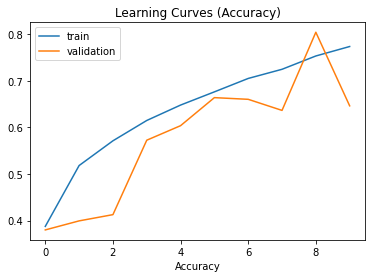

In [20]:
import matplotlib.pyplot as plt
plt.title('Learning Curves (Accuracy)')
plt.xlabel('Epoch')
plt.xlabel('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='validation')
plt.legend()
plt.show()

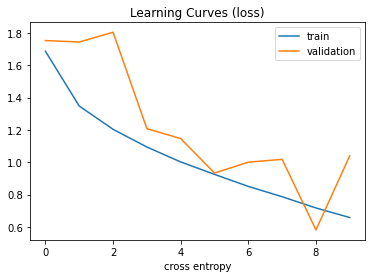

In [21]:
plt.title('Learning Curves (loss)')
plt.xlabel('Epoch')
plt.xlabel('cross entropy')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.legend()
plt.show()